# Wine pairing
Zuzanna Gawrysiak 148255, Agata Żywot 148258


Goal of the project:
1. Adding flavor information (sweet, acid, salt, piquant, fat, bitter) from https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews to FlavorGraph.
2. Utilizing embeddings and flavors for pairing with wine from https://www.kaggle.com/datasets/roaldschuring/wine-reviews.

### Import necessary libraries

In [1]:
import pandas as pd
import requests

from bs4 import BeautifulSoup
from src.plots.eda_plots import *

## EDA

### [Amazon Fine Food Reviews](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews) -> change dataset?

In [2]:
reviews_df = pd.read_csv('data/Reviews.csv')
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# reviews_df.isnull().sum()
reviews_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [4]:
reviews_df["Score"].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

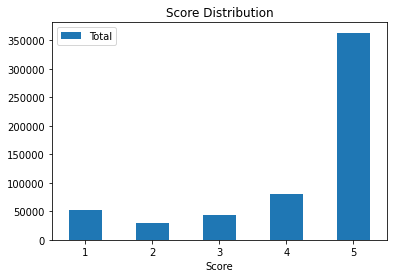

In [5]:
# Rating distribution
plot_score_distribution(reviews_df)

In [25]:
# TODO: The reviews need to be cleaned up
top_words = pd.Series(' '.join(reviews_df["Text"]).split()).value_counts()
top_words[:10]

the    1628045
I      1388076
and    1228666
a      1163164
to      992367
of      789652
is      714264
it      631252
for     519983
in      512394
Name: count, dtype: int64

In [6]:
HEADERS = ({'User-Agent':'Mozilla/5.0', 'Accept-Language': 'en-US, en;q=0.5'})

def search_amazon_product_by_id(product_id):
    amazon_url = f'https://www.amazon.com/dp/{product_id}'

    try:
        response = requests.get(amazon_url, headers=HEADERS)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        print("HTML:")
        print(soup.prettify())

        title_element = soup.find('span', {'id': 'productTitle'})
        title = title_element.text.strip() if title_element else 'Title not found'
        product_info = {
            'id': product_id,
            'title': title,
        }

        return product_info

    except requests.exceptions.RequestException as e:
        print(f"Error during request: {e}")
        return None


In [7]:
product_id = "B003VIFH1K"
product_info = search_amazon_product_by_id(product_id)

print(product_info)

HTML:
<!DOCTYPE html>
<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="a-no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title dir="ltr">
   Amazon.com
  </title>
  <meta content="width=device-width" name="viewport"/>
  <link href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css" rel="stylesheet"/>
  <script>
   if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-na.amazon.com",


### [Wine Reviews](https://www.kaggle.com/datasets/roaldschuring/wine-reviews)
TODO